In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 示例

In [13]:
'''构建原始数据'''

data = [1,1,1,0,0,0,0
,1,1,1,1,0,0,0
,1,0,0,1,1,0,1
,1,0,1,1,0,1,0
,1,1,1,1,1,1,0]
data = np.array(data).reshape(5,7)
#data = pd.DataFrame(data)
#data.columns = ['A','B','C','D','E','F','G']
#data.index = ['01','02','03','04','05']
data

array([[1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0]])

In [70]:
'''测试pd.df与np.array的转换关系'''

#data0 = pd.DataFrame(data)
#data0
#np.array(data0)

,0,1,2,3,4,5,6
0,1,1,1,0,0,0,0
1,1,1,1,1,0,0,0
2,1,0,0,1,1,0,1
3,1,0,1,1,0,1,0
4,1,1,1,1,1,1,0


In [56]:
'''构建产品数目矩阵'''

data2 = np.dot(data,data.transpose())
print('共同数目矩阵：','\n',data2,'\n')
print('用户拥有产品数目：','\n',data2.diagonal(),'\n')
diag = np.sqrt(data2.diagonal())
print('开方后的用户拥有产品数目：','\n',diag)

共同数目矩阵： 
 [[3 3 1 2 3]
 [3 4 2 3 4]
 [1 2 4 2 3]
 [2 3 2 4 4]
 [3 4 3 4 6]] 

用户拥有产品数目： 
 [3 4 4 4 6] 

开方后的用户拥有产品数目： 
 [1.73205081 2.         2.         2.         2.44948974]


In [52]:
'''构建余弦相似度矩阵'''

data3 = data2[0]/(diag[0]*diag)

for i in range(1,data2.shape[0]):
    data3 = np.append(data3,data2[i]/(diag[i]*diag),axis=0)
    
data3 = data3.reshape(5,5)
np.fill_diagonal(data3, np.zeros(5))
data3

array([[0.        , 0.8660254 , 0.28867513, 0.57735027, 0.70710678],
       [0.8660254 , 0.        , 0.5       , 0.75      , 0.81649658],
       [0.28867513, 0.5       , 0.        , 0.5       , 0.61237244],
       [0.57735027, 0.75      , 0.5       , 0.        , 0.81649658],
       [0.70710678, 0.81649658, 0.61237244, 0.81649658, 0.        ]])

In [69]:
'''最近邻算法'''

def NearestNUserNeighborhood(userid, S, n):
    '''
    userid: 目标用户index
    S: 相似度矩阵
    n: n个邻居
    返回：pd.Series，其中index是邻居名称，values是距离
    '''
    return pd.Series(S[userid]).nlargest(n).index

# test
NearestNUserNeighborhood(0,data3,2)

Int64Index([1, 4], dtype='int64')

In [168]:
'''推荐'''

user_id = 0
neighbor = set(NearestNUserNeighborhood(user_id,data3,2))
print('neighbor:',neighbor)
#object_data = data.transpose()

# 已购买产品id
used_id = np.flatnonzero(data[user_id])
if len(used_id)==data.shape[1]:
    print('该用户购买过所有产品')
else:
    print('该用户购买过的产品为:',used_id)

# 未购买产品id
unuse_id = np.array(range(data.shape[1]))[data[user_id]==0]
print('该用户未购买过的产品为:',unuse_id)

# 未购买产品的推荐程度
prod_recom = np.zeros(shape=(len(unuse_id),2))
prod_recom[:,0] = unuse_id
k = 0
for i in unuse_id: 
    unuse_user_id = set(np.flatnonzero(data[:,i])) #购买过该产品的用户
    print('购买过产品',i,'的用户有:',unuse_user_id)
    print('交叉用户包括:',list(unuse_user_id.intersection(neighbor)))
    prod_recom[k,1] = data3[list(unuse_user_id.intersection(neighbor)),user_id].sum()
    k = k+1
prod_recom

neighbor: {1, 4}
该用户购买过的产品为: [0 1 2]
该用户未购买过的产品为: [3 4 5 6]
购买过产品 3 的用户有: {1, 2, 3, 4}
交叉用户包括: [1, 4]
购买过产品 4 的用户有: {2, 4}
交叉用户包括: [4]
购买过产品 5 的用户有: {3, 4}
交叉用户包括: [4]
购买过产品 6 的用户有: {2}
交叉用户包括: []


array([[3.        , 1.57313218],
       [4.        , 0.70710678],
       [5.        , 0.70710678],
       [6.        , 0.        ]])

In [196]:
index = np.argsort(prod_recom[:,1])[::-1][0:2]
#np.flipud(prod_recom[index,:]) #整个数组反转
prod_recom[index,:]

array([[3.        , 1.57313218],
       [5.        , 0.70710678]])

-----
## Recommender函数

In [353]:
def Cal_Similarity(data):
    n = data.shape[0]
    '''构建共同数目矩阵'''
    data2 = np.dot(data,data.transpose())
    diag = np.sqrt(data2.diagonal())
    '''计算相似度矩阵'''
    data3 = data2[0]/(diag[0]*diag)
    for i in range(1,data2.shape[0]):
        data3 = np.append(data3,data2[i]/(diag[i]*diag),axis=0)
    data3 = data3.reshape(n,n)
    np.fill_diagonal(data3, np.zeros(n))
    return data3

In [354]:
def NearestNUserNeighborhood(user_id, S, k):
    '''
    user_id: 目标用户index
    S: 相似度矩阵
    k: k个邻居
    返回：邻居index
    '''
    return pd.Series(S[user_id]).nlargest(k).index

In [232]:
def Recommender(user_id, data, S, k, n):
    '''
    user_id: 目标用户index
    data: 原矩阵
    S: 相似度矩阵
    k: k个邻居
    n: 前n个产品
    返回：前n个产品的index和感兴趣程度
    '''
    
    if data[user_id].sum()==0:
        hot_items = pd.Series(data.sum(axis=0)).nlargest(n) #各产品累积购买次数
        return hot_items
    else:
        
        # 近邻
        neighbor = set(NearestNUserNeighborhood(user_id,S,k))
        print('neighbor:',neighbor)
        
        # 已购买产品id
        used_id = np.flatnonzero(data[user_id])
        if len(used_id)==data.shape[1]:
            print('该用户购买过所有产品')
        else:
            print('该用户购买过的产品为:',used_id)
        
        # 未购买产品id
        unuse_id = np.array(range(data.shape[1]))[data[user_id]==0]
        print('该用户未购买过的产品为:',unuse_id)
    
        # 未购买产品的推荐程度
        prod_recom = np.zeros(shape=(len(unuse_id),2))
        prod_recom[:,0] = unuse_id
        k = 0
        for i in unuse_id: 
            unuse_user_id = set(np.flatnonzero(data[:,i])) #购买过该产品的用户
            #print('购买过产品',i,'的用户有:',unuse_user_id)
            #print('交叉用户包括:',list(unuse_user_id.intersection(neighbor)))
            prod_recom[k,1] = S[list(unuse_user_id.intersection(neighbor)),user_id].sum()
            k = k+1
    
        # 排序
        index = np.argsort(prod_recom[:,1])[::-1][0:n]
        return prod_recom[index,:]

In [205]:
'''以data来测试'''

Recommender(2, data, Cal_Similarity(data), 3, 2)

neighbor: {1, 3, 4}
该用户购买过的产品为: [0 3 4 6]
该用户未购买过的产品为: [1 2 5]


array([[2.        , 1.61237244],
       [5.        , 1.11237244]])

In [233]:
'''以data_2来测试'''

data_2 = [1,1,1,0,0,0,0
,1,1,1,1,0,0,0
,1,0,0,1,1,0,1
,1,0,1,1,0,1,0
,1,1,1,1,1,1,0
,0,0,0,0,0,0,0]

data_2 = np.array(data_2).reshape(6,7)

Recommender(5, data_2, Cal_Similarity(data_2), 3, 2)

/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


0    5
2    4
dtype: int64

----
### 测试真实数据

In [356]:
'''导入客户数据'''

cust = pd.read_csv("/root/work/cust_value_new.csv")
del cust['Unnamed: 0']
del cust['CUST_ASSET_AMT.1']
del cust['CUST_PRODUCT_CNT.1']
del cust['L3_CUST_SAME_IN_CNT']
del cust['L3_CUST_DIFF_IN_CNT']
del cust['CUST_AUM.1']
del cust['age.1']
del cust['NEIGHBORHOOD_CUST_FLAG.1']
print(cust.shape)
cust.head()

(77048, 14)


,DEP_SA_FLAG,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,QSQA_FLAG,QSAB_FLAG,QSQC_FLAG,CRED_FLAG
0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,0,0,0,1


In [357]:
cust2 = cust.sample(n=1000,random_state=2020)
print(sum(cust2['DEP_SA_FLAG']))
del cust2['DEP_SA_FLAG'] #去掉活期产品
print(cust2.shape)
cust2.head()

959
(1000, 13)


,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,QSQA_FLAG,QSAB_FLAG,QSQC_FLAG,CRED_FLAG
46486,0,0,0,0,0,0,0,0,0,0,0,0,0
54812,0,0,0,0,0,0,0,0,0,0,0,0,1
15159,0,1,0,0,0,0,0,0,0,0,0,0,0
12984,1,1,0,0,0,0,0,0,0,0,0,0,0
525,0,0,0,0,0,0,0,0,0,0,0,0,0


In [358]:
cust2 = np.array(cust2)

In [234]:
# 对第0个用户

Recommender(0, cust2, Cal_Similarity(cust2), k=20, n=5)

/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


0     188
12    153
10    135
2     134
1      98
dtype: int64

In [248]:
# 对全部用户

S =  Cal_Similarity(cust2)
for i in range(0,100):
    print(Recommender(i, cust2, S, k=20, n=5))



/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


0     188
12    153
10    135
2     134
1      98
dtype: int64
neighbor: {193, 195, 5, 165, 197, 106, 170, 76, 171, 174, 111, 202, 81, 52, 21, 53, 120, 91, 124, 189}
该用户购买过的产品为: [12]
该用户未购买过的产品为: [ 0  1  2  3  4  5  6  7  8  9 10 11]
[[11.  0.]
 [10.  0.]
 [ 9.  0.]
 [ 8.  0.]
 [ 7.  0.]]
neighbor: {224, 66, 259, 132, 164, 39, 107, 268, 332, 78, 142, 112, 17, 29, 336, 341, 343, 123, 188, 61}
该用户购买过的产品为: [1]
该用户未购买过的产品为: [ 0  2  3  4  5  6  7  8  9 10 11 12]
[[12.  0.]
 [11.  0.]
 [10.  0.]
 [ 9.  0.]
 [ 8.  0.]]
neighbor: {33, 2, 835, 38, 39, 137, 41, 42, 12, 13, 590, 59, 17, 819, 23, 57, 26, 27, 29, 31}
该用户购买过的产品为: [0 1]
该用户未购买过的产品为: [ 2  3  4  5  6  7  8  9 10 11 12]
[[12.          1.63299316]
 [11.          0.        ]
 [10.          0.        ]
 [ 9.          0.        ]
 [ 8.          0.        ]]
0     188
12    153
10    135
2     134
1      98
dtype: int64
neighbor: {1, 193, 195, 165, 197, 106, 170, 76, 171, 174, 111, 202, 81, 52, 53, 21, 120, 91, 124, 189}
该用户购买过的产品为: [12]
该用户

neighbor: {128, 225, 36, 133, 229, 295, 266, 240, 241, 84, 149, 54, 310, 56, 185, 186, 92, 221, 414, 191}
该用户购买过的产品为: [2]
该用户未购买过的产品为: [ 0  1  3  4  5  6  7  8  9 10 11 12]
[[12.  0.]
 [11.  0.]
 [10.  0.]
 [ 9.  0.]
 [ 8.  0.]]
0     188
12    153
10    135
2     134
1      98
dtype: int64
neighbor: {89, 33, 65, 38, 72, 41, 42, 59, 12, 13, 74, 77, 86, 23, 87, 57, 26, 27, 63, 31}
该用户购买过的产品为: [0]
该用户未购买过的产品为: [ 1  2  3  4  5  6  7  8  9 10 11 12]
[[12.  0.]
 [11.  0.]
 [10.  0.]
 [ 9.  0.]
 [ 8.  0.]]
0     188
12    153
10    135
2     134
1      98
dtype: int64
0     188
12    153
10    135
2     134
1      98
dtype: int64
neighbor: {89, 33, 65, 69, 38, 41, 42, 59, 12, 13, 74, 77, 86, 23, 87, 57, 26, 27, 63, 31}
该用户购买过的产品为: [0]
该用户未购买过的产品为: [ 1  2  3  4  5  6  7  8  9 10 11 12]
[[12.  0.]
 [11.  0.]
 [10.  0.]
 [ 9.  0.]
 [ 8.  0.]]
0     188
12    153
10    135
2     134
1      98
dtype: int64
neighbor: {89, 33, 65, 69, 38, 72, 41, 42, 59, 12, 13, 77, 86, 23, 87, 57, 26, 27, 63, 31}


----
## Recommender2函数

对训练集/测试集推荐产品

In [355]:
def Recommender2(user_id, data, S, k, n):
    '''
    user_id: 目标用户index
    data: 原矩阵
    S: 相似度矩阵
    k: k个邻居
    n: 前n个产品
    返回：前n个产品的index和感兴趣程度
    '''
    
    if data[user_id].sum()==0:
        hot_items = pd.Series(data.sum(axis=0)).nlargest(n) #各产品累积购买次数
        return [100,100,100]
    else:
        
        # 近邻
        neighbor = set(NearestNUserNeighborhood(user_id,S,k))
        #print('neighbor:',neighbor)
    
        # 各产品推荐程度
        prod_n = data.shape[1] #产品数量
        prod_recom = np.zeros(shape=prod_n)
        k = 0
        for i in range(prod_n): 
            used_user_id = set(np.flatnonzero(data[:,i])) #购买过该产品的用户
            #print('购买过产品',i,'的用户有:',unuse_user_id)
            #print('交叉用户包括:',list(unuse_user_id.intersection(neighbor)))
            prod_recom[k] = S[list(used_user_id.intersection(neighbor)),user_id].sum()
            k = k+1
    
        # 排序
        index = set(np.argsort(prod_recom)[::-1][0:n])
        # 已购买产品id
        used_id = set(np.flatnonzero(data[user_id]))
        # 交集
        correct = index.intersection(used_id)
        
        # 准确率
        precision = len(correct)/len(index)
        # 召回率
        recall = len(correct)/len(used_id)
        # f1
        f1 = 2*precision*recall/(precision+recall)
        
        return [precision,recall,f1]

In [288]:
'''以data_2来测试'''

data_2 = np.array(data_2).reshape(6,7)

result = []
for i in range(data_2.shape[0]):
    result.append(Recommender2(i, data_2, Cal_Similarity(data_2), 3, 2))
result

/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


[[0.5, 0.3333333333333333, 0.4],
 [1.0, 0.5, 0.6666666666666666],
 [0.5, 0.25, 0.3333333333333333],
 [0.5, 0.25, 0.3333333333333333],
 [1.0, 0.3333333333333333, 0.5],
 [100, 100, 100]]

In [300]:
result = np.array(result)
result = result[result != 100].reshape(5,3)
result.mean(axis=0)

array([0.7       , 0.33333333, 0.44666667])

In [322]:
'''以真实数据来测试'''

S =  Cal_Similarity(cust2)

result_n = np.zeros(shape=(20,3))

num = 0
for j in range(5,101,5):
    result = [] #precision recall f1
    for i in range(cust2.shape[0]):
        result.append(Recommender2(i, cust2, S, k=j, n=5))  
    result = np.array(result)
    result = result[result != 100].reshape(-1,3)
    result_n[num] = result.mean(axis=0)
    num = num+1

/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [351]:
print(list(range(5,101,5)))
print(result_n)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[[0.28185328 0.99887387 0.42054299]
 [0.28108108 0.99790862 0.41968499]
 [0.28146718 0.99855212 0.42016762]
 [0.28146718 0.99864865 0.42021052]
 [0.28146718 0.99864865 0.42021052]
 [0.28146718 0.99864865 0.42021052]
 [0.28108108 0.99816602 0.41978152]
 [0.27992278 0.99671815 0.41849451]
 [0.27992278 0.99671815 0.41849451]
 [0.27953668 0.99607465 0.41801189]
 [0.27876448 0.99494852 0.41710026]
 [0.27799228 0.99398327 0.41624226]
 [0.27799228 0.99398327 0.41624226]
 [0.27799228 0.99398327 0.41624226]
 [0.27799228 0.99398327 0.41624226]
 [0.27799228 0.99398327 0.41624226]
 [0.27799228 0.99398327 0.41624226]
 [0.27799228 0.99398327 0.41624226]
 [0.27760618 0.99301802 0.41569069]
 [0.27760618 0.99301802 0.41569069]]


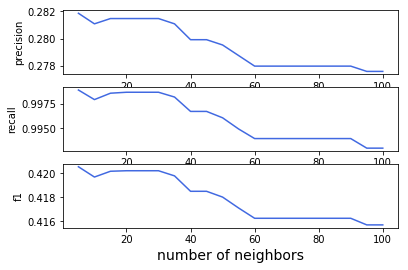

In [347]:
fig = plt.figure()

plt.subplot(3,1,1)
plt.plot(list(range(5,101,5)),result_n[:,0],color='#4169E1')
plt.ylabel("precision",fontsize=10)
plt.subplot(3,1,2)
plt.plot(list(range(5,101,5)),result_n[:,1],color='#4169E1',label='ratio for each')
plt.ylabel("recall",fontsize=10)
plt.subplot(3,1,3)
plt.plot(list(range(5,101,5)),result_n[:,2],color='#4169E1',label='ratio for each')
plt.ylabel("f1",fontsize=10)

plt.xlabel("number of neighbors",fontsize=14)

plt.savefig('usercf-1.png',dpi=600)
plt.show()

In [365]:
'''以真实数据来测试'''

S =  Cal_Similarity(cust2)

result_n0 = np.zeros(shape=(33,3))

num = 0
for j in range(1,100,3):
    result = [] #precision recall f1
    for i in range(cust2.shape[0]):
        result.append(Recommender2(i, cust2, S, k=j, n=5))  
    result = np.array(result)
    result = result[result != 100].reshape(-1,3)
    result_n0[num] = result.mean(axis=0)
    num = num+1

/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [373]:
print(list(range(1,100,3))) 
result_n0

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


array([[0.27992278, 0.9963964 , 0.41838726],
       [0.28185328, 0.99887387, 0.42054299],
       [0.28146718, 0.99839125, 0.42011399],
       [0.28108108, 0.99790862, 0.41968499],
       [0.28108108, 0.99790862, 0.41968499],
       [0.28146718, 0.99855212, 0.42016762],
       [0.28108108, 0.99816602, 0.41978152],
       [0.28146718, 0.99864865, 0.42021052],
       [0.28146718, 0.99864865, 0.42021052],
       [0.28146718, 0.99864865, 0.42021052],
       [0.28108108, 0.99816602, 0.41978152],
       [0.28146718, 0.99864865, 0.42021052],
       [0.28030888, 0.99720077, 0.41892352],
       [0.27992278, 0.99671815, 0.41849451],
       [0.27992278, 0.99671815, 0.41849451],
       [0.27992278, 0.99671815, 0.41849451],
       [0.27992278, 0.99671815, 0.41849451],
       [0.27915058, 0.99543115, 0.41752926],
       [0.27876448, 0.99494852, 0.41710026],
       [0.27876448, 0.99494852, 0.41710026],
       [0.27799228, 0.99398327, 0.41624226],
       [0.27799228, 0.99398327, 0.41624226],
       [0.

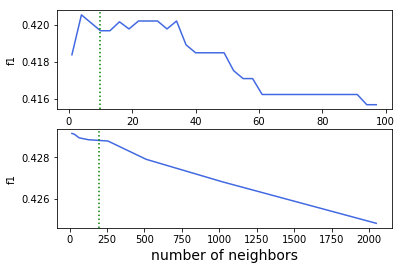

In [375]:
fig = plt.figure()

#plt.subplot(3,1,1)
#plt.plot(list(range(1,100,3)),result_n0[:,0],color='#4169E1')
#plt.ylabel("precision",fontsize=10)
#plt.subplot(3,1,2)
#plt.plot(list(range(1,100,3)),result_n0[:,1],color='#4169E1',label='ratio for each')
#plt.ylabel("recall",fontsize=10)
plt.subplot(2,1,1)
plt.plot(list(range(1,100,3)),result_n0[:,2],color='#4169E1',label='ratio for each')
plt.ylabel("f1",fontsize=10)
plt.axvline(x=10,ls=":",color="green")

num2 = [2**x for x in range(4,12)]

plt.subplot(2,1,2)
plt.plot(num2,result_n2[:,2],color='#4169E1',label='ratio for each')
plt.ylabel("f1",fontsize=10)
plt.axvline(x=200,ls=":",color="green")

plt.xlabel("number of neighbors",fontsize=14)

plt.savefig('usercf-0.png',dpi=600)
plt.show()

In [340]:
cust3 = cust.sample(n=20000,random_state=2020)
print(sum(cust3['DEP_SA_FLAG']))
del cust3['DEP_SA_FLAG']
print(cust3.shape)
cust3.head()

19122
(20000, 13)


,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,QSQA_FLAG,QSAB_FLAG,QSQC_FLAG,CRED_FLAG
46486,0,0,0,0,0,0,0,0,0,0,0,0,0
54812,0,0,0,0,0,0,0,0,0,0,0,0,1
15159,0,1,0,0,0,0,0,0,0,0,0,0,0
12984,1,1,0,0,0,0,0,0,0,0,0,0,0
525,0,0,0,0,0,0,0,0,0,0,0,0,0


In [341]:
cust3 = np.array(cust3)

In [345]:
S2 =  Cal_Similarity(cust3)

num = [2**x for x in range(4,12)]
result_n2 = np.zeros(shape=(8,3))

time = 0
for j in num:
    result = [] #precision recall f1
    for i in range(cust3.shape[0]):
        result.append(Recommender2(i, cust3, S2, k=j, n=5))  
    result = np.array(result)
    result = result[result != 100].reshape(-1,3)
    result_n2[time] = result.mean(axis=0)
    time = time+1

/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


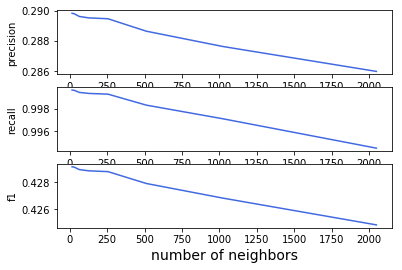

In [348]:
fig = plt.figure()

plt.subplot(3,1,1)
plt.plot(num,result_n2[:,0],color='#4169E1')
plt.ylabel("precision",fontsize=10)
plt.subplot(3,1,2)
plt.plot(num,result_n2[:,1],color='#4169E1',label='ratio for each')
plt.ylabel("recall",fontsize=10)
plt.subplot(3,1,3)
plt.plot(num,result_n2[:,2],color='#4169E1',label='ratio for each')
plt.ylabel("f1",fontsize=10)

plt.xlabel("number of neighbors",fontsize=14)
plt.savefig('usercf-2.png',dpi=600)
plt.show()

In [350]:
print(num)
print(result_n2)

[16, 32, 64, 128, 256, 512, 1024, 2048]
[[0.28982254 0.99962225 0.42913623]
 [0.28978417 0.99958936 0.42910106]
 [0.28961151 0.99941441 0.42892694]
 [0.28951559 0.99932397 0.42883421]
 [0.28945803 0.99926071 0.42877521]
 [0.28863309 0.99830147 0.42789688]
 [0.28761631 0.99710791 0.42681246]
 [0.28596643 0.99454585 0.42483203]]
